**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
FOLDER_REG = "region_active"
FOLDER_ANT = "annotation_tss_pol2"

In [3]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_enhancer_merge",
    FOLDER_REG,
    "summary")
dir(fdiry)

[1] "peak.summary.ccre_v3.tsv"         "peak.summary.ccre_v4.tsv"        
[3] "peak.summary.TSS_Pol2_RNAseq.tsv" "peak.summary.TSS_Pol2.tsv"

In [7]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_enhancer_merge",
    FOLDER_REG,
    "summary")
fname = "peak.summary.TSS_Pol2_RNAseq.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_summary = dat
print(dim(dat))
head(dat)

[1] 10069     9


Peak,Assay_Type,Assay_Label,Annotation,Label,Count,Region,Score,Note
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
chr1:28903-29613,ATAC,ATAC,TSS_Pol2_RNAseq,TSS,1,chr1:29370-29371,0.00023000,WASH7P
chr1:826642-828040,"ATAC,CRISPRi-Growth,ENCODE-E2G_Prediction,LMPRA,WSTARR","ATAC,CRISPRi-Growth,ENCODE-E2G_Prediction:FAM87B,ENCODE-E2G_Prediction:LINC00115,ENCODE-E2G_Prediction:LINC01128,ENCODE-E2G_Prediction:LOC100288069,ENCODE-E2G_Prediction:SAMD11,LMPRA_A,WSTARR_A,WSTARR_AB",TSS_Pol2_RNAseq,TSS,2,chr1:827522-827523|chr1:827590-827591,64.46295000,LINC00115|LINC01128
chr1:876474-878030,ATAC,ATAC,TSS_Pol2_RNAseq,TSS,1,chr1:876802-876803,0.00788399,FAM41C
chr1:958685-959974,"ATAC,ENCODE-E2G_Prediction,LMPRA,WSTARR","ATAC,ENCODE-E2G_Prediction:KLHL17,ENCODE-E2G_Prediction:NOC2L,ENCODE-E2G_Prediction:PLEKHN1,ENCODE-E2G_Prediction:SAMD11,LMPRA_A,LMPRA_AB,WSTARR_A,WSTARR_AB",TSS_Pol2_RNAseq,TSS,1,chr1:959256-959257,104.86600000,NOC2L
chr1:960292-961635,"ATAC,ENCODE-E2G_Prediction,LMPRA,WSTARR","ATAC,ENCODE-E2G_Prediction:KLHL17,ENCODE-E2G_Prediction:NOC2L,ENCODE-E2G_Prediction:PLEKHN1,LMPRA_A,LMPRA_AB,WSTARR_A",TSS_Pol2_RNAseq,TSS,1,chr1:960583-960584,8.22571000,KLHL17
chr1:998921-1001250,"ATAC,ENCODE-E2G_Prediction,WSTARR","ATAC,ENCODE-E2G_Prediction:AGRN,ENCODE-E2G_Prediction:CALML6,ENCODE-E2G_Prediction:FNDC10,ENCODE-E2G_Prediction:HES4,ENCODE-E2G_Prediction:ISG15,ENCODE-E2G_Prediction:LOC105378591,ENCODE-E2G_Prediction:PLEKHN1,ENCODE-E2G_Prediction:PRKCZ,ENCODE-E2G_Prediction:RNF223,ENCODE-E2G_Prediction:SAMD11,ENCODE-E2G_Prediction:SLC35E2B,ENCODE-E2G_Prediction:TAS1R3,ENCODE-E2G_Prediction:TTLL10,WSTARR_A,WSTARR_AB",TSS_Pol2_RNAseq,TSS,1,chr1:1000097-1000098,50.58140000,HES4


In [14]:
dat = dat_peak_total
dat = dat %>% dplyr::select(Chrom, Start, End, Assay_Type) %>% dplyr::distinct()
print(dim(dat))

[1] 472141      4


In [26]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_enhancer_merge")
fname = "enhancer_merge.concat.starrmpra_crispr_atac.active.merge.bed.gz"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Assay_Type", "Assay_Label")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Peak = paste0(Chrom, ":", Start, "-", End))

dat_peak_total = dat
print(dim(dat))
head(dat)

[1] 303293      6


Chrom,Start,End,Assay_Type,Assay_Label,Peak
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,ATAC,ATAC,chr1:10015-10442
chr1,14253,14645,ATAC,ATAC,chr1:14253-14645
chr1,16015,16477,ATAC,ATAC,chr1:16015-16477
chr1,17237,17772,ATAC,ATAC,chr1:17237-17772
chr1,28903,29613,ATAC,ATAC,chr1:28903-29613
chr1,30803,31072,ATAC,ATAC,chr1:30803-31072


In [27]:
dat = dat_peak_total
dat = dat %>% dplyr::distinct()
print(dim(dat))

[1] 303293      6


In [28]:
dat = dat_peak_total
dat = dat %>% dplyr::select(Chrom, Start, End) %>% dplyr::distinct()
print(dim(dat))

[1] 303293      3


In [30]:
dat = dat_peak_annot_summary
dat = dat %>% tidyr::separate_longer_delim(Assay_Type, ",")

lst = split(dat$Peak, dat$Assay_Type)
lst = lapply(lst, unique)

lst_txt_peak_annot = lst
print(names(lst))

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-E2G_Benchmark"  "ENCODE-E2G_Prediction"
[7] "LMPRA"                 "TMPRA"                 "WSTARR"               


In [31]:
dat = dat_peak_total
dat = dat %>% tidyr::separate_longer_delim(Assay_Type, ",")

lst = split(dat$Peak, dat$Assay_Type)
lst = lapply(lst, unique)

lst_txt_peak_total = lst
print(names(lst))

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-E2G_Benchmark"  "ENCODE-E2G_Prediction"
[7] "LMPRA"                 "TMPRA"                 "WSTARR"               


In [39]:
###
lst1 = lst_txt_peak_annot
lst2 = lst_txt_peak_total
vec  = names(lst1)
names(vec) = vec
vec_txt_assay = vec

###
lst = lapply(vec_txt_assay, function(txt_assay){
    vec1 = lst1[[txt_assay]]
    vec2 = lst2[[txt_assay]]
    vec  = vec1 %in% vec2
    res  = list(length(vec1), length(vec2), length(vec1)/length(vec2), all(vec))
    names(res) = c("Count_TSS", "Count_Total", "Freq_TSS", "Check")
    return(res)
})

###
dat = bind_rows(lst, .id="Assay")
dat = dat %>% 
    dplyr::mutate(
        Count_Label = ifelse(
            Count_Total > 1000, 
            paste0(round(Count_Total / 1000), "K"),
            Count_Total
        )
    ) %>%
    dplyr::mutate(
        Assay_Label = paste0(Assay, " (", Count_Label, ")")
    )

###
dat_peak_isTSS = dat
dat

Assay,Count_TSS,Count_Total,Freq_TSS,Check,Count_Label,Assay_Label
<chr>,<int>,<int>,<dbl>,<lgl>,<chr>,<chr>
ASTARR,1787,8539,0.20927509,TRUE,9K,ASTARR (9K)
ATAC,9867,247249,0.03990714,TRUE,247K,ATAC (247K)
CRISPRi-Growth,1532,6169,0.24833847,TRUE,6K,CRISPRi-Growth (6K)
CRISPRi-HCRFF,19,75,0.25333333,TRUE,75,CRISPRi-HCRFF (75)
ENCODE-E2G_Benchmark,7,381,0.01837270,TRUE,381,ENCODE-E2G_Benchmark (381)
ENCODE-E2G_Prediction,9614,45429,0.21162693,TRUE,45K,ENCODE-E2G_Prediction (45K)
LMPRA,5782,37633,0.15364175,TRUE,38K,LMPRA (38K)
TMPRA,119,7538,0.01578668,TRUE,8K,TMPRA (8K)
WSTARR,7811,71498,0.10924781,TRUE,71K,WSTARR (71K)


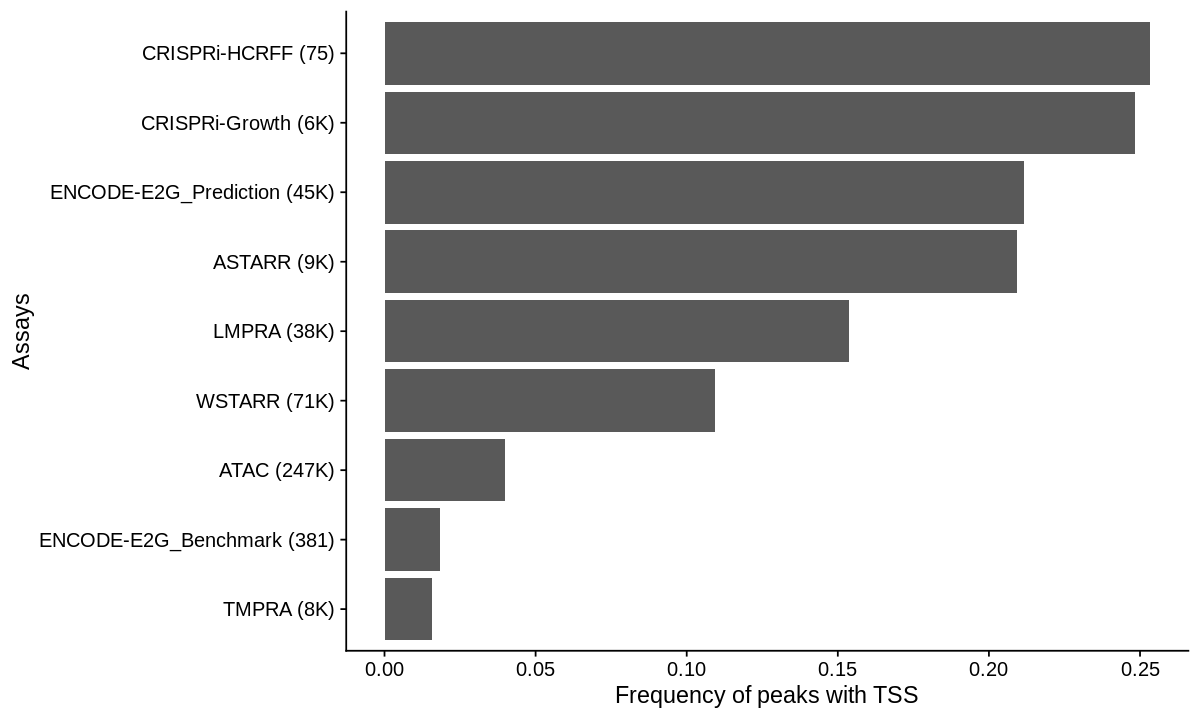

In [40]:
dat = dat_peak_isTSS
dat = dat %>% 
    dplyr::arrange(Freq_TSS) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels=Assay_Label))

gpt = ggplot(dat, aes(x=Freq_TSS, y=Assay_Label)) + 
    geom_col() + 
    labs(x="Frequency of peaks with TSS", y="Assays") +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

In [8]:
dat = dat_peak_annot_summary
table(dat$Count)


   1    2    3    5    7 
8864 1171   32    1    1 

In [6]:
dat = dat_peak_annot_summary
dat = dat %>% tidyr::separate_longer_delim(Assay_Type, ",")

### count each
dat1 = dat %>%
    dplyr::group_by(Label, Assay_Type) %>%
    dplyr::summarise(Count = sum(Count), .groups = "drop")

### count total
dat2 = dat %>%
    dplyr::group_by(Assay_Type) %>%
    dplyr::summarise(Total = sum(Count), .groups = "drop")

### merge
dat = dat1 %>% 
    dplyr::left_join(dat2, by = "Assay_Type") %>%
    dplyr::mutate(Freq = Count / Total)

dat_ccre_count = dat
print(dim(dat))
head(dat)

[1] 68  5


Label,Assay_Type,Count,Total,Freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>
CA-CTCF,ASTARR,324,25733,0.012590837
CA-CTCF,ATAC,23103,364867,0.063318963
CA-CTCF,CRISPRi-Growth,1007,16883,0.059645798
CA-CTCF,ENCODE-E2G_Benchmark,5,1148,0.004355401
CA-CTCF,ENCODE-E2G_Prediction,5983,120622,0.049601234
CA-CTCF,LMPRA,5918,92588,0.063917570


In [ ]:
dat = dat_ccre_count

###
vec = c(
    "ATAC", 
    "ASTARR", "WSTARR", "TMPRA", "LMPRA", 
    "CRISPRi-HCRFF", 
    "CRISPRi-Growth", 
    "ENCODE-E2G_Benchmark",
    "ENCODE-E2G_Prediction")

dat = dat %>% dplyr::mutate(Assay_Type = factor(Assay_Type, levels=rev(vec)))

###
vec = c(
    "PLS"        = "#fb8072", 
    "pELS"       = "#fdb462", 
    "dELS"       = "#80b1d3", 
    "CA-TF"      = "#8dd3c7", 
    "CA-H3K4me3" = "#fee08b",  
    "CA-CTCF"    = "#bebada", 
    "CA-only"    = "#fccde5", 
    "Low-DNase"  = "#d9d9d9")
theme_fill = scale_fill_manual(values = vec)

gpt = ggplot(dat, aes(x=Assay_Type, y=Freq, fill=Label)) + 
    geom_col() +
    labs(x="Assay", y="Proportion") +
    coord_flip() +
    theme_cowplot() +
    theme_fill

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

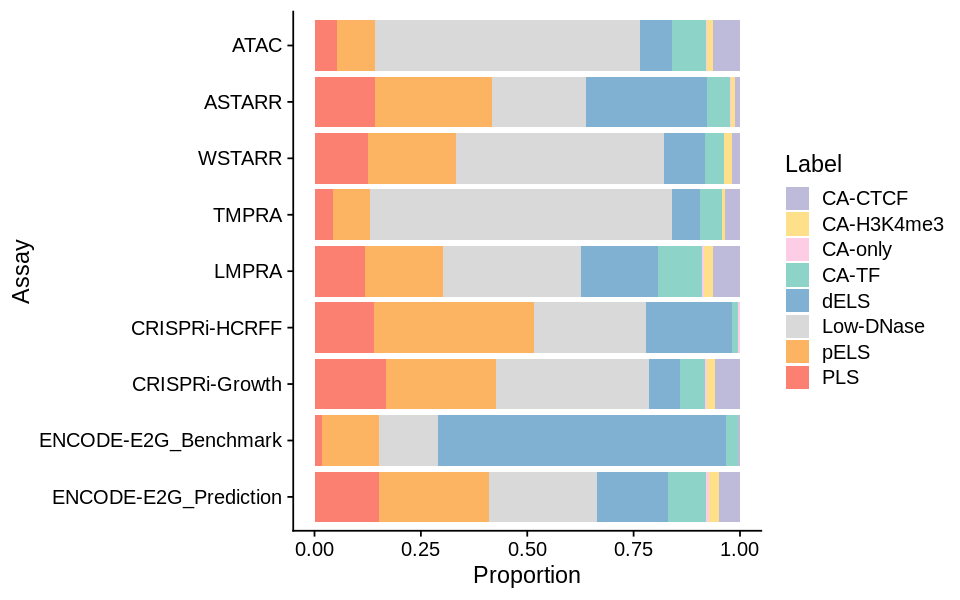

In [16]:
dat = dat_ccre_count

###
vec = c(
    "ATAC", 
    "ASTARR", "WSTARR", "TMPRA", "LMPRA", 
    "CRISPRi-HCRFF", 
    "CRISPRi-Growth", 
    "ENCODE-E2G_Benchmark",
    "ENCODE-E2G_Prediction")

dat = dat %>% dplyr::mutate(Assay_Type = factor(Assay_Type, levels=rev(vec)))

###
vec = c(
    "PLS"        = "#fb8072", 
    "pELS"       = "#fdb462", 
    "dELS"       = "#80b1d3", 
    "CA-TF"      = "#8dd3c7", 
    "CA-H3K4me3" = "#fee08b",  
    "CA-CTCF"    = "#bebada", 
    "CA-only"    = "#fccde5", 
    "Low-DNase"  = "#d9d9d9")
theme_fill = scale_fill_manual(values = vec)

gpt = ggplot(dat, aes(x=Assay_Type, y=Freq, fill=Label)) + 
    geom_col() +
    labs(x="Assay", y="Proportion") +
    coord_flip() +
    theme_cowplot() +
    theme_fill

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)